# Employee Attrition Experiment: Request for Comment

This synthetic dataset from Kaggle ([IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)), simulates attrition and related factors leading to employee attrition. The main objective of this dataset is to predict employee attrition. However, we explore the variables to find out if there is any potential factor(s) that leads to attrition, and propose an experiment aiming at measuring the impact of such factors towards employee attrition.  

> We time away from family seems to be a contributing factor for attrition in this dataset. In this proposal, we propose two separate experiments testing the effect of time with family and attrition. 


In [1]:
#Loading packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
#Loading data
data = pd.read_csv('Attrition.csv')  
print("Total entries: {}".format(len(data)))
data.head(5)

Total entries: 1470


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In the following charts I give an overview of the variables in this dataset, including their description, unique values, null values, and an overall distribution. There are 35 variables for 1470 entries with no null values. 

In [8]:
#creating a chart for variable description and information

#Creating indices with the given column names 
info_index = data.columns.tolist()

#Creating a list of variable description 
variable_desc = ['Age', "Attrition", "Business Travel", "Daily Rate", 
                "Department", "Distance from home in miles", "Education: 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor",
                 "Education field", "Employee count", "Employee Number", 
                 "Environment Satisfaction: 1-'Low' 2 'Medium' 3 'High' 4 'Very High'", 
                 "Gender", "Hourly Rate", 
                 "Job Involvement: 1-4: 'Low'-'Very High'", "Job Level", "Job Role", 
                 "Job Satisfaction: 1-4: 'Low'-'Very High'", "Marrital status", 
                 "Monthly income", "Monthly rate", "Number of companies worked before this job", 
                 "Over 18 years","Have Overtime", "Percent salary hike", 
                 "Performance Rating: 1-'Low', 2-'Good', 3-'Excellent', 4-'Outstanding'",
                 "Relationship Satisfaction: 1-4: 'Low'-'Very High'", "Standard Hours'", 
                 "Stock Option Level", "Total Working Years", 
                 "Training Times Last Year", 
                 "Work Life Balance: 1-'Bad', 2-'Good', 3-'Better', 4-'Best'", 
                 "Years At Company", 'Years In Current Role', 'Years Since Last Promotion',
                 'Years With Current Manager']


#Creating a dataframe with the column names as index, and variable description for describing each variable
variable_info = pd.DataFrame(variable_desc, columns=["Variable Description"], index=info_index)

#Adding a list of type of variables
variable_type = []
for variable in data.iloc[1, :]:
    variable_type.append(type(variable))
variable_type = pd.DataFrame(variable_type, columns=["Variable types"], index=info_index)
    
#Unique values 
variable_uv = []

#Null values 
variable_nan = []

for index in range(len(info_index)):
    variable_uv.append(data.iloc[:, index].unique().shape[0])
    variable_nan.append(data.iloc[:,index].isnull().sum())

#adding to dataframe

variable_uv = pd.DataFrame(variable_uv, columns=['Unique values count'], index=info_index)
variable_nan = pd.DataFrame(variable_nan, columns=["Null values count"], index=info_index)

#final chart 

variable_info = pd.concat([variable_info, variable_type, variable_uv, variable_nan], axis=1)

variable_info

,Variable Description,Variable types,Unique values count,Null values count
Age,Age,<class 'numpy.int64'>,43,0
Attrition,Attrition,<class 'str'>,2,0
BusinessTravel,Business Travel,<class 'str'>,3,0
DailyRate,Daily Rate,<class 'numpy.int64'>,886,0
Department,Department,<class 'str'>,3,0
DistanceFromHome,Distance from home in miles,<class 'numpy.int64'>,29,0
Education,"Education: 1-Below College, 2-College, 3-Bache...",<class 'numpy.int64'>,5,0
EducationField,Education field,<class 'str'>,6,0
EmployeeCount,Employee count,<class 'numpy.int64'>,1,0
EmployeeNumber,Employee Number,<class 'numpy.int64'>,1470,0


In [3]:
#Changing qualitative ('string') values to quantitative ('numerical') values

def str_to_num(list, df):
    for variable in list:
        num_values = pd.Series(sorted(df[variable].unique())).to_dict()
        num_values = dict([(value,key) for key,value in num_values.items()])
        print(num_values)
        df[variable] = df[variable].map(num_values)
    return df

#print(data.iloc[0,:])
listed = ["Attrition", "BusinessTravel","Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
str_to_num(listed, data)

data.head()

{'No': 0, 'Yes': 1}
{'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
{'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
{'Female': 0, 'Male': 1}
{'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
{'Divorced': 0, 'Married': 1, 'Single': 2}
{'No': 0, 'Yes': 1}


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


## 1. Data exploration 

Let us first take a look at how these variables are correlated. We calculated Pearson's Correlation Coefficient (*r*) for all variables in the dataset. From the following correlation matrix and the correlation values, we find the following: 

- Except for a few, the variables in this dataset are not highly correlated. 
- **Attrition** is positively correlated with **over time** (*r* = 0.246), and this is the highest correlation among other variables. The attrition rate increases with more overtime.  
- Attrition is also positively correlated with **marital status** (*r* = 0.162) and **distance from home** (*r* = 0.07).  
- On the other hand, attrition is slightly negatively correlated with **total working years** (*r* = -0.171) and **job level** (*r* = -0.169). 

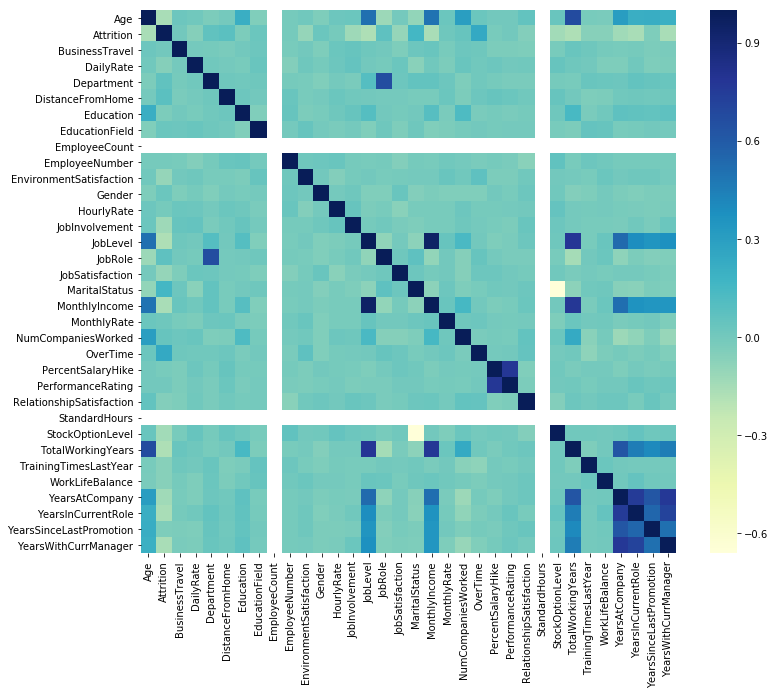

In [4]:
corr = data.corr(method='pearson')

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

In [5]:
#corr.iloc[1].sort_values()

### 1.1 Exploring attrition and overtime 

The overall attrition rate in this dataset is 16%. That is, for every 100 employees, about 16 of them leave. Among this 16%, 7.5% employees had overtime, while 8.5% of them didn't have overtime. Thus, given overtime, there is a 9% increase in the chance of leaving. The attrition rate in the overtime is significantly higher that the attrition rate when there is no overtime, as shown in the t-test. 

In [9]:
#% calculation for attrition and overtime. Findings: 

#data.Attrition.value_counts()  #1-237, 0-1233
237/1470  #--> 16% attrition rate in overall employees

#data[["OverTime", "Attrition"]].groupby("OverTime").Attrition.value_counts()
110/(944+110+289+127) #among the 16%, only 7.5% didn't have overtime 
127/(944+110+289+127) #only 8.6% had overtime
10/110 #attrition increases 9% when given overtime. 10 (127-110)

#Given overtime, 30.5% of them have a prpobability to leave, whereas (69.5% stay)
#Given no overtime, only 10% of them leave, 89.5% stay. 

#no OT and yet attrition - 10%
110/(944+110)  #only 10% of the employees have atttrition when no overtime

#yes OT and attrition - 30%
127/(127+289)  #30% of the employees have attrition when given overtime 

#no OT no attrition 89.5%
944/(944+110)

#OT yet no attrition #69.5%
127/(289+127)


0.30528846153846156

Text(0.5,1,'Employees in overtime')

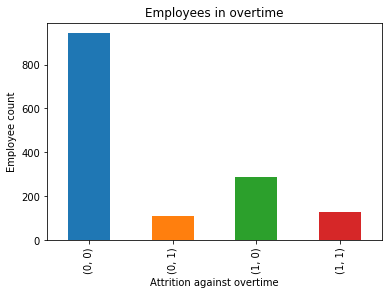

In [10]:
data[["OverTime", "Attrition"]].groupby("OverTime").Attrition.value_counts().plot(kind='bar')
plt.title("Employee count by overttime and attrition")
plt.xlabel("Attrition against overtime")
plt.ylabel("Employee count")
plt.title("Employees in overtime")

In [11]:
#checking the significance of the difference 

print("The t-statistic and the p-value are: {}".
      format(stats.ttest_ind(data[data.OverTime == 1].Attrition,data[data.OverTime==0].Attrition)))

The t-statistic and the p-value are: Ttest_indResult(statistic=9.729155002966676, pvalue=1.0092540336563068e-21)


### 1.2 Exploring attrition and distance from home

Attrition is also mildly correlated with distance from home. In the following charts we see that there is a 58-60% increase in attrition once an employee's distance from home is more than 10 miles. 
    

In [30]:
for i in range(0,29,6):
    dfg_mean = data[['DistanceFromHome', 'Attrition']].groupby('DistanceFromHome').mean()
    print(i, "-", i+5, "miles range, attrition mean: ", 
          dfg_mean.iloc[i:i+5].mean()[0])

0 - 5 miles range, attrition mean:  0.14376784846275367
6 - 11 miles range, attrition mean:  0.1467110196123357
12 - 17 miles range, attrition mean:  0.23346467129361867
18 - 23 miles range, attrition mean:  0.19280099237993972
24 - 29 miles range, attrition mean:  0.17642834138486313


Text(0,0.5,'Attrition mean')

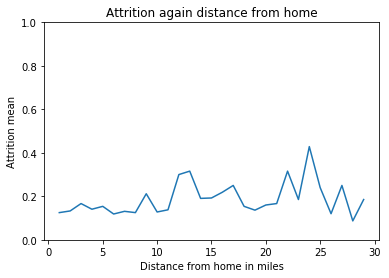

In [38]:
#(.233-.146)/.146  #59.5% increase
data.groupby("DistanceFromHome")['Attrition'].mean().plot()
plt.ylim(0,1)
plt.title("Attrition again distance from home")
plt.xlabel("Distance from home in miles")
plt.ylabel("Attrition mean")

## 2. Experiment proposal: Request For Comment

### 2.1 Problem 

The objective of this analysis is to find out what factor(s) contributes to employee attrition, and to propose a potential solution through a research proposal. Attrition creates inefficiency as a new employee hire procedure costs significant amount of time, money and effort.  

Preliminary analysis shows that overtime and distance from home are correlated with attrition. More employees tend to leave the company if their job responsibilities include overtime. Employees with overtime shows a 9% increase in attrition. Employees also tend to leave if the distance from home is more than 10 miles. When the distance is more than 10 miles, there is a 58-60% increase in the attrition rate. 

The common factor in these two variables seems to be the fact that these employees are spending more time away from home than their counterparts. A potential solution could be finding ways to increase their time at home.  

Therefore, the research question is: *How to decrease employee attrition by increasing the amount of time an employee spends at home?*



### 2.2 Potential Solution

Offering certain amount of remote work (work-from-home) could be a potential solution for this problem. The hypothesis we want to test in this experiment is: *offering remote work for a day per week will decreases employee attrition by increasing employee comfort. 

#### 2.2.1 Experiment 1

Employees who have more than 8 hours of overtime in a week, will be offered to take a one day work-from-home in every two weeks. 

#### 2.2.2 Experiment 2

Employees who travel more than 10 miles each way will be offered to take a one day work-from-home in every week.

Both experiments will run for three months but not simultaneously. Employees will be sent a survey to complete after three months asking if they enjoy this offer. 


#### 2.2.3 Potential biases and cautions

The variables, OverTime and DistanceFromHome, are not normally distributed in the dataset. Likewise, it is expected that the data collectd for the experiment will have sampling bias. We need to be careful while collecting data and limit data collection to similar number of samples from each level. 


In [1]:
#data.groupby("OverTime")['Attrition'].value_counts().plot(kind='hist')
#data.groupby("DistanceFromHome")['Attrition'].value_counts().plot(kind='hist')

### 2.3 Methods

#### 2.3.1 Experiment 1

Sample selection 
- Select employees from the company's database who have more than eight hours of overtime in a week. Offer them one day work-from-home in every two weeks. Employees selected for this program would be the test group and their performance would be compared to the historical data (the control group). 


#### 2.3.2 Experiment 2

Sample selection 
- similarly to the experiement 1, we will select employees from the company's database who have more than ten miles of distance from home each way, and offer them one day work-from-home in every week. Employees selected for this program would be the test group and their performance would be compared to the historical data (the control group). 


#### 2.3.3 Estimation of infrastructure

Only 28% of the employees in the original data set have overtime. Three months seem to be a moderate time to gather enough data for significance testing. 


#### 2.4 Success metrics
Since we are considering the current data as the control group, attributes like "WorkLifeBalance" and "JobSatisfaction" will be two major success metrics. We predict the ratings to increase if the hypothesis is true.

#### 2.4.1 Secondary metrics

Some secondary metrics of interest could be "JobInvolmenent", ""RelationshipSatisfaction". We could design several other secondary metrics and include them in the survey. For example, incorporating questions like, 'how likely you are to stay in the company for the next year?', or 'how likely you are to refer this company to friends?' could be interesting to analyze.

### 2.4 Future direction 

The longer the study runs the more data we gather and improve statistical significance. We could run the study for six months, and administer the  same survey twice a year. But ultimately what this dataset offers us is the insights of different factors on attrition. 